# <center>Food Coloring Spectra</center>
## <center>Will Mulberry and Kevan Williams</center>

This report details the process taken to gather UV/Vis spectroscopy data for water and food coloring mixtures.  
  
**Methods:**  
A cell, that held approximately 3mL of fluid was constructed using gaskets and Specac Spec-B Windows for UV/Vis spectroscopy. Fiber optic cables were used to direct light through the cell for spectroscopy measurements. An Ocean Optics Deuterium/Halogen light source and spectrometer were used to gather the data. Solutions of water and food coloring were passed through the cell via syringes and spectroscopic measurements were taken.  
  
Between each measurement, the cell was flushed with clear water 5-10 times or until the color was no longer apparent in the cell.

<center>$Absorption = -\ln({\frac{I-I_{background}}{I_0-I_{background}}})$</center>

This equation describes the absorption calculation. *I<sub>background</sub>* represents data taken while covering the detector this accounts for bias in the detector. *I<sub>0</sub>* represents the baseline measurement, in this case the baseline was clear water. *I* represents the spectra data taken from the desired subject, in this case this is a water and food coloring mixture.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os

path = os.path.dirname(os.getcwd())
# edit your path file here
path_folder = path + "\\Battery Recycling\\5.23.2024 testing\\"

def absorbance(background, baseline, measurement, color, rows=14):
    # we take in 3 files, skip rows, and gather wavelength and intensity data
    backwave, backval = np.loadtxt(background, unpack = True, skiprows = rows)
    basewave, baseval = np.loadtxt(baseline, unpack = True, skiprows = rows)
    measurewave, measureval = np.loadtxt(measurement, unpack = True, skiprows = rows)
    
    absorbance = -np.log( (measureval-backval) / (baseval-backval) )
    
    plt.plot(measurewave, absorbance, c=color)
    plt.grid()
    plt.xlabel("Wavelength")
    plt.ylabel("Absorbance")
    plt.show()

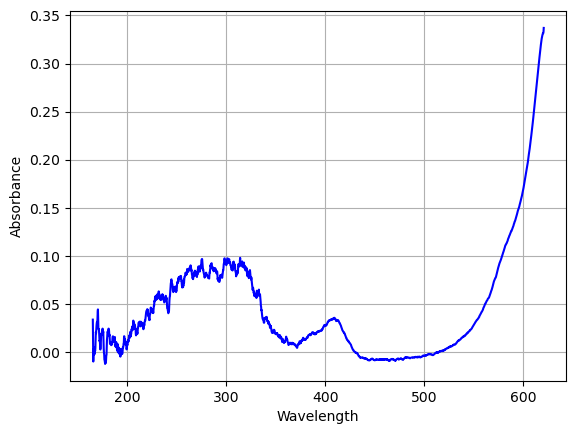

In [27]:
absorbance(path_folder+"background.txt",path_folder+"baseline.txt",path_folder+"blue2base.txt","blue",14)

Figure 1: Absorbance spectra for blue food coloring in water

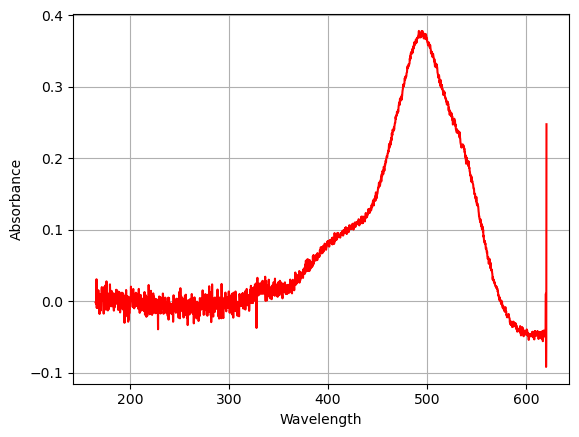

In [28]:
absorbance(path_folder+"background.txt",path_folder+"water2.txt",path_folder+"red1w2.txt","red",14)

Figure 2: Absorbance spectra for red food coloring in water

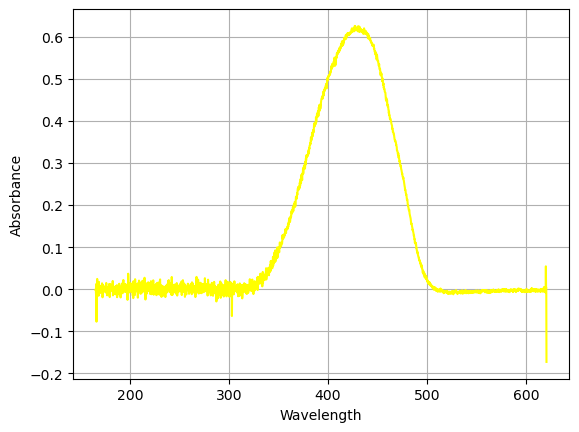

In [29]:
absorbance(path_folder+"background.txt",path_folder+"water3.txt",path_folder+"yellow1w3.txt","yellow",14)

Figure 3: Absorbance spectra for yellow food coloring in water

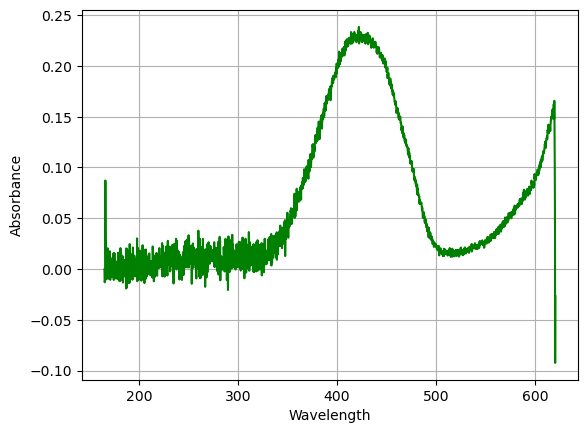

In [30]:
absorbance(path_folder+"background.txt",path_folder+"water4.txt",path_folder+"green1w4.txt","green",14)

Figure 4: Absorbance spectra for green food coloring in water

![Reference Spectra for Food Coloring](https://media.cheggcdn.com/study/d0a/d0ad1769-3293-4bf9-93b0-3558227fcdc5/image)

## Creating Mixtures
The three plots below in order are blue and yellow mixed, only blue, and only yellow

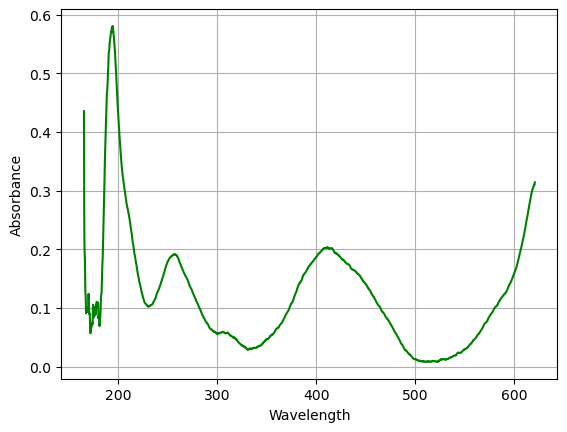

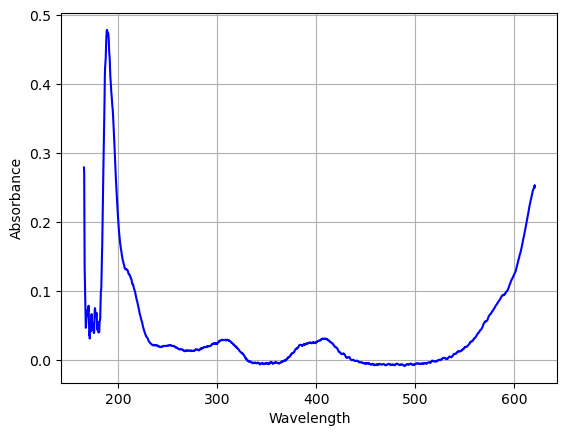

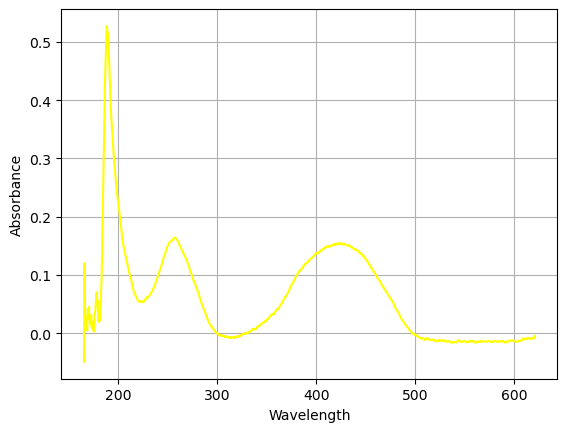

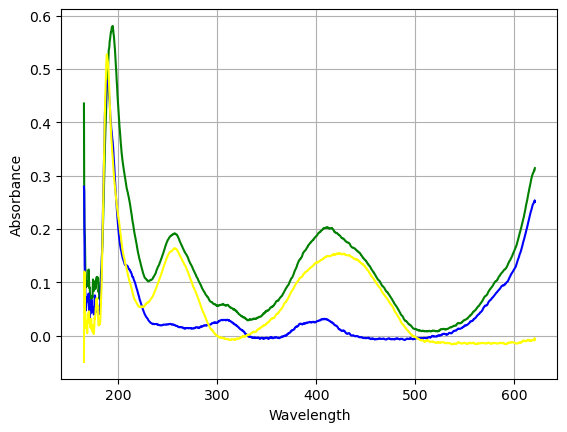

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

path = os.path.dirname(os.getcwd())
# edit your path file here
path_folder = path + "\\Battery Recycling\\6.13.2024 Testing\\"


def absorbance(background, baseline, measurement, color, rows=14):
    # we take in 3 files, skip rows, and gather wavelength and intensity data
    backwave, backval = np.loadtxt(background, unpack = True, skiprows = rows)
    basewave, baseval = np.loadtxt(baseline, unpack = True, skiprows = rows)
    measurewave, measureval = np.loadtxt(measurement, unpack = True, skiprows = rows)
    
    absorbance = -np.log( (measureval-backval) / (baseval-backval) )
    
    plt.plot(measurewave, absorbance, c=color)
    plt.grid()
    plt.xlabel("Wavelength")
    plt.ylabel("Absorbance")
    plt.show()
    return measurewave, absorbance
measurewave1, absorbance1 = absorbance("C:/Users/Modes Lab/Desktop/MODES/Battery Recycling/6.13.2024 Testing/dark.txt", "C:/Users/Modes Lab/Desktop/MODES/Battery Recycling/6.13.2024 Testing/base.txt", "C:/Users/Modes Lab/Desktop/MODES/Battery Recycling/6.13.2024 Testing/mix.txt", "green", 14)
measurewave2, absorbance2 = absorbance("C:/Users/Modes Lab/Desktop/MODES/Battery Recycling/6.13.2024 Testing/dark.txt", "C:/Users/Modes Lab/Desktop/MODES/Battery Recycling/6.13.2024 Testing/base.txt", "C:/Users/Modes Lab/Desktop/MODES/Battery Recycling/6.13.2024 Testing/blue.txt", "blue", 14)
measurewave3, absorbance3 = absorbance("C:/Users/Modes Lab/Desktop/MODES/Battery Recycling/6.13.2024 Testing/dark.txt", "C:/Users/Modes Lab/Desktop/MODES/Battery Recycling/6.13.2024 Testing/base.txt", "C:/Users/Modes Lab/Desktop/MODES/Battery Recycling/6.13.2024 Testing/yellow.txt", "yellow", 14)
plt.plot(measurewave1, absorbance1, c="green")
plt.plot(measurewave2, absorbance2, c="blue")
plt.plot(measurewave3, absorbance3, c = "yellow")
plt.grid()
plt.xlabel("Wavelength")
plt.ylabel("Absorbance")
plt.show()

The results from our spectroscopy analysis of food coloring in water resemble the absorbance spectra found online. Therefore we can conclude that our process for UV/VIS spectroscopy, and our Python code is useful for basic calculations of absorbance.  
Elimination of noise through coding filters are recommended for further improvement of this process.

## Concentration Prediction

This section details code that was created to predict the concentration of food coloring in a sample, given some sample concentrations.  
For this process, multiple spectra are taken, their peaks are observed, then a linear fit is applied to the peak heights at each wavelength. Upon measuring a sample of unknown concentration, the code uses the observed peak height, and fits it to the line created from the test spectra, it then outputs the predicted concentration as an array of concentrations from each peak.

Prediction: [2.62923864 2.61914902]


C:\Users\Modes Lab\AppData\Local\Temp\ipykernel_21196\2827753250.py:31: RuntimeWarning: invalid value encountered in log
  absorbance = -np.log( (measureval-backval) / (baseval-backval) )
C:\Users\Modes Lab\AppData\Local\Temp\ipykernel_21196\2827753250.py:31: RuntimeWarning: divide by zero encountered in log
  absorbance = -np.log( (measureval-backval) / (baseval-backval) )
C:\Users\Modes Lab\AppData\Local\Temp\ipykernel_21196\2827753250.py:49: RuntimeWarning: divide by zero encountered in log
  absorbance = -np.log( (measureval-backval) / (baseval-backval) )


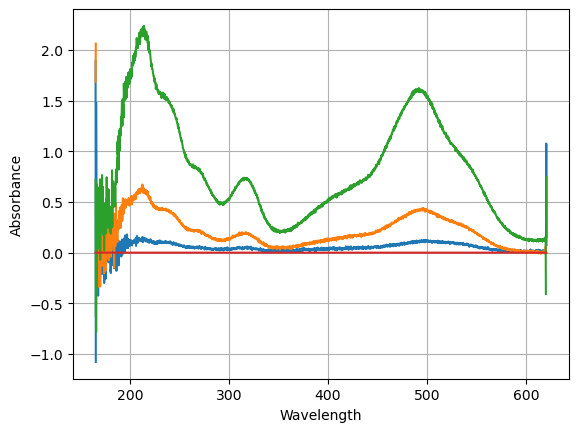

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import scipy.signal as sp

path = os.path.dirname(os.getcwd())
path = path + "\\Battery Recycling\\6.6.2024 Testing\\"

background = path + "dark.txt"

baseline = path + "background_MAYP1115451__1__09-32-25-157.txt"

testdata = path + "red4_MAYP1115451__0__09-42-21-108.txt"

path_folder = path + "concentration tests\\"

directory = glob.glob(os.path.join(path_folder, '*.txt'))

concentration = np.array([2,3,5])


def absorbances(background, baseline, directory, rows=14):
   # we take in 2 files for our background and baseline and a directory to read all files from its folder so we can collect large amounts of data
   data = np.zeros((len(directory),2068))
   a = 0
   for file in directory:
           backwave, backval = np.loadtxt(background, unpack = True, skiprows = rows)
           basewave, baseval = np.loadtxt(baseline, unpack = True, skiprows = rows)
           measurewave, measureval = np.loadtxt(file, unpack = True, skiprows = rows)
           absorbance = -np.log( (measureval-backval) / (baseval-backval) )
           data[a,:] = absorbance
           a = a + 1
   for i in range(len(data[0:])):
       plt.plot(measurewave, data[i,:])
       plt.grid()
       plt.xlabel("Wavelength")
       plt.ylabel("Absorbance")
   plt.plot(measurewave, -np.zeros(len(measurewave)))
   return measurewave, data




def absorbance(background, baseline, file, rows = 14):
    backwave, backval = np.loadtxt(background, unpack = True, skiprows = rows)
    basewave, baseval = np.loadtxt(baseline, unpack = True, skiprows = rows)
    measurewave, measureval = np.loadtxt(file, unpack = True, skiprows = rows)
    absorbance = -np.log( (measureval-backval) / (baseval-backval) )
    return absorbance



   

measurewave, data = absorbances(background, baseline, directory, 14)
newdata = absorbance(background, baseline, testdata, 14)

j = sp.find_peaks(data[0,:],width = 15, height = .01)

def prediction(measurewave, concentrations, data, peakwidths, peakheights, newdata):
    peakdata = sp.find_peaks(data[0,:],width = peakwidths, height = peakheights)
    
    peaks = peakdata[0]
    
    conc_pred = np.array([])
    
    for i in range(len(peaks)):
        plotdata = np.array([])
        for j in range(len(data[:,0])):
            plotdata = np.append(plotdata, data[j, peaks[i]])
        A,B = np.polyfit(concentrations, plotdata,deg = 1)
        conc_pred = np.append(conc_pred, (newdata[peaks[i]] - B)/A)
    return conc_pred
        
final_predictions = prediction(measurewave, concentration, data, 15, .01, newdata)
print("Prediction:",final_predictions)